In [1]:
import sys
sys.path.append('../pouakai')
from core import *
%matplotlib widget
from astropy.stats import sigma_clip

In [2]:
hdu = fits.open('A6309-12932zephyr-R-4_cal.fits.gz')
#hdu = fits.open('A6524-lsst4-R-3_cal.fits.gz')
#hdu = fits.open('A7312-yse415Ba-R-3_cal.fits.gz')
#hdu = fits.open('A7238-yse257Aa-R-3_cal.fits.gz')


#hdu = fits.open('A6385-12932zephyr-V-3_cal.fits.gz')
hduf = fits.open('F5857-121-R-m-4.fits.gz')
flat = hduf[0].data
e = hduf[1].data

In [3]:
image = hdu[0].data
mask = hdu[1].data
header = hdu[0].header
wcs = WCS(header)


515
740
[350.70813738 350.70816729 350.71202455 350.71291081 350.71322225
 350.71384084 350.71427123 350.71665431 350.72655594 350.72998832
 350.73039076 350.73390008 350.73580183 350.73704269 350.73845745
 350.74083967 350.73986936 350.74204368 350.74524007 350.74721532
 350.74885394 350.74923931 350.74953647 350.75322453 350.75689573
 350.75759916 350.76004071 350.76151531 350.76179803 350.76323872
 350.76338003 350.76568029 350.76680337 350.76720626 350.76784413
 350.76873368 350.76799168 350.76817376 350.76871704 350.76941207
 350.76988898 350.77071616 350.77126682 350.77106163 350.77241726
 350.77220376 350.77254032 350.77236065 350.77317293 350.77334002
 350.7742113  350.77430818 350.77515623 350.77465794 350.77531086
 350.77539536 350.77537512 350.77536942 350.77492069 350.77569143
 350.77680732 350.77700679 350.77719231 350.77770048 350.77765589
 350.77797451 350.77824298 350.77868557 350.77794532 350.77935639
 350.77905669 350.77940723 350.78006545 350.77997648 350.7811692
 35

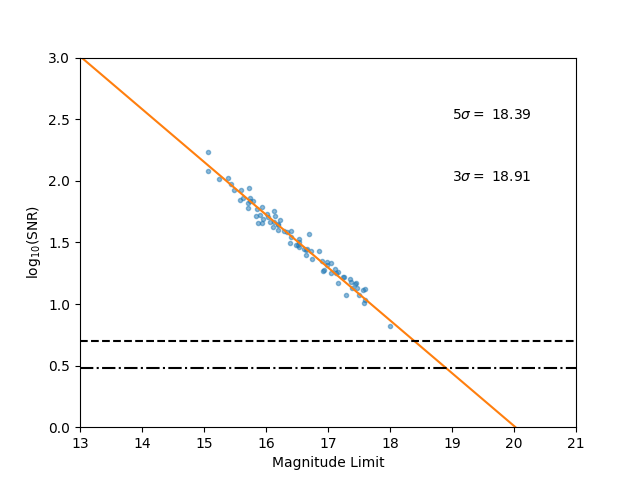

In [4]:
fig, ax = plt.subplots()
cal = ap_photom(data=image,wcs=wcs, header=header,mask =mask,
                    threshold=5,cal_model='ckmodel',ax=ax,brightlim=15)

In [13]:
plt.savefig('maglim_test.png')

In [5]:
cal.zp_std

0.062309001968060766

In [6]:
ra = cal.sauron.system_cat['ra'].values
dec = cal.sauron.system_cat['dec'].values
c = SkyCoord(ra,dec, unit="deg")

In [7]:
x,y = wcs.all_world2pix(ra,dec,0)

In [8]:
ind = cal.sauron.cat_mags['r'].values > 21

(0.0, 3.0)

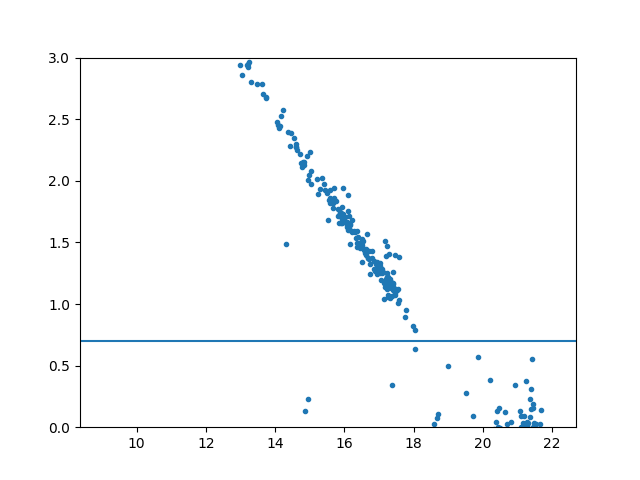

In [9]:
plt.figure()
plt.plot(cal.sauron.cat_mags['i'],np.log10(cal.ap_photom['snr']),'.')
#plt.plot(cal.sauron.cat_mags['i'],np.log10(cal.ap_photom['counts']/3817),'.')
plt.axhline(np.log10(5))
plt.ylim(0,3)

In [10]:
cal.ap_photom[ind]['bkg_std']

22     22.506793
30     25.513503
39     26.101859
40     26.300468
41     26.744552
         ...    
602    30.159807
603    29.219196
610    23.038179
661    51.256808
662    34.274780
Name: bkg_std, Length: 248, dtype: float64

In [11]:
cal.ap_photom[ind]['bkg_std'].median()

29.993665421863508

In [12]:
cal.radius

2.4

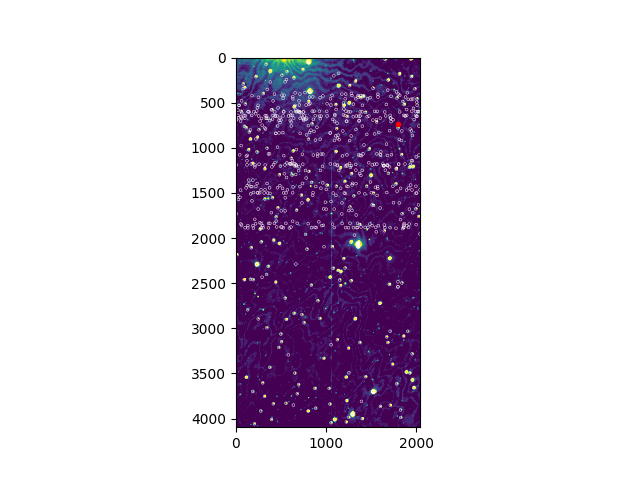

In [26]:
ind = (cal.sauron.cat_mags['r'].values > 19) & (cal.sauron.cat_mags['r'].values < 20)
plt.figure()
plt.imshow(image- 974.563214,vmin=0,vmax=100)
plt.plot(x[ind][10],y[ind][10],'r.')
ap_patches = cal.aperture.plot(color='white', lw=2,
                           label='Photometry aperture')


In [27]:
cal.radius

2.4

In [17]:
cal.ap_photom.iloc[ind].iloc[10]

id                247.000000
xcenter          1803.543029
ycenter           747.048427
aperture_sum    17944.093028
bkg_median        974.563214
bkg_std            28.119711
area               18.095574
aper_bkg        17635.280444
counts            308.812584
e_counts          508.842310
snr                 0.606893
sysmag             -6.224237
flag                0.000000
Name: 246, dtype: float64

In [7]:
cal.zp_std

0.08044063232679777

In [20]:
from photutils import DAOStarFinder, aperture_photometry

In [24]:
test = aperture_photometry(cal.data- 974.563214,cal.aperture)

In [25]:
test[ind][10]

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
247,1803.5430293830084,747.0484273378679,308.81257865311966


In [8]:
ind = cal.ap_photom['flag'].values 

(array([2., 1., 2., 3., 9., 6., 5., 0., 0., 3., 6., 0., 5., 2., 0., 2., 1.,
        0., 1., 1.]),
 array([30.04700071, 30.06409244, 30.08118417, 30.09827589, 30.11536762,
        30.13245935, 30.14955108, 30.1666428 , 30.18373453, 30.20082626,
        30.21791799, 30.23500971, 30.25210144, 30.26919317, 30.2862849 ,
        30.30337662, 30.32046835, 30.33756008, 30.35465181, 30.37174353,
        30.38883526]),
 <BarContainer object of 20 artists>)

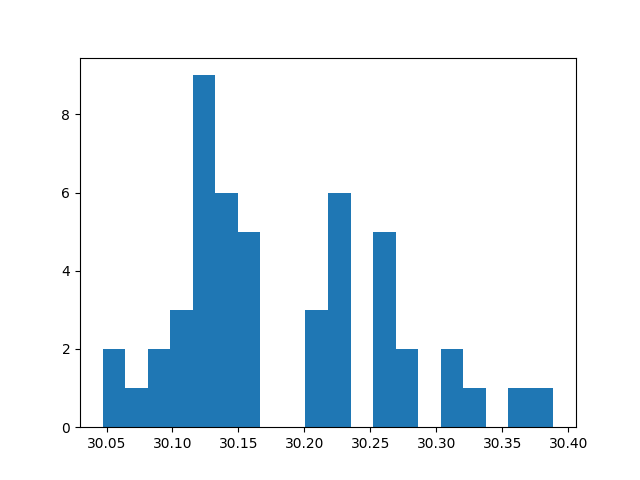

In [6]:
plt.figure()
plt.hist(cal.zps,bins=20)

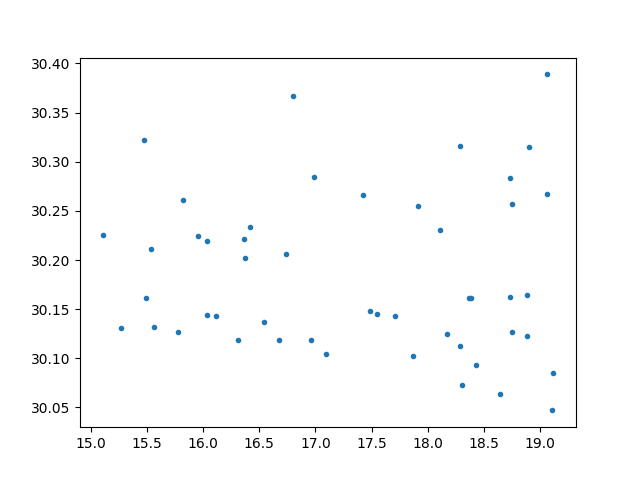

In [9]:
plt.figure()
plt.plot(cal.sauron.cat_mags['r'].values,cal.zps,'.')

In [8]:
cal.zp

30.23116015292488

In [9]:
cal.zp_std

0.061360189029935286

In [10]:
gr = (cal.sauron.cat_mags.g  - cal.sauron.cat_mags.r).values

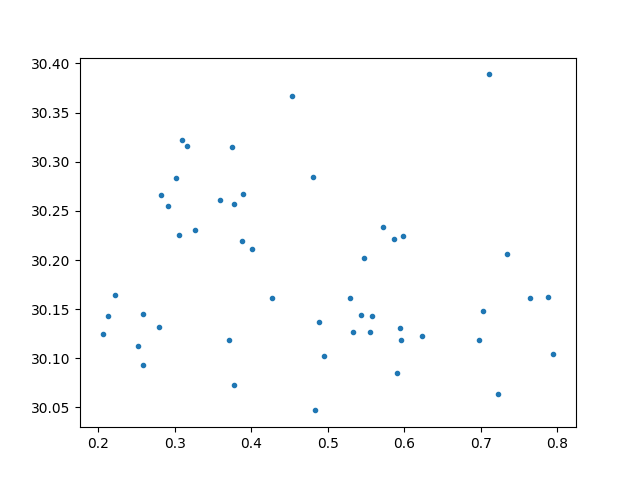

In [12]:
plt.figure()
plt.plot(gr,cal.zps,'.')

In [25]:
big = cal.zps > 30.1
small = (cal.zps < 30.1) & (cal.zps > 0)

In [27]:
zps = cal.pred_mag - cal.ap_photom['sysmag'].values
snr = cal.ap_photom['counts'].values / cal.ap_photom['e_counts'].values
ind = (cal.pred_mag > 14) & (snr > 10)#(cal.pred_mag < 19)
z = zps[ind]
zz = sigma_clip(z).mask
z = z[~zz]

In [30]:
b = np.where(np.isfinite(zps))[0]
b = np.where(big)[0]

<IPython.core.display.Javascript object>


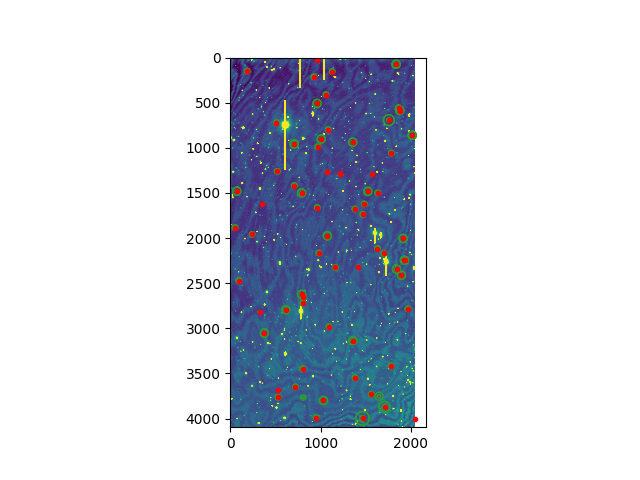

In [40]:
plt.figure()
plt.imshow(image,vmin=5300,vmax=5800)
plt.plot(cal.ap_photom.xcenter.iloc[b],cal.ap_photom.ycenter.iloc[b],'r.')
ax = plt.gca()
for i in range(len(b)):
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radii[b[i]], color='r',fill=False)
    ax.add_patch(c)
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radii[b[i]]*4, color='C2',fill=False)
    ax.add_patch(c)
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radii[b[i]]*10, color='C2',fill=False)
    ax.add_patch(c)
#plt.plot(cal.ap_photom.xcenter.iloc[ind],cal.ap_photom.ycenter.iloc[ind],'b.')

In [16]:
plt.figure()
plt.imshow(image,vmin=5300,vmax=5800)

ap_patches = cal.aperture.plot(color='white', lw=2,
                           label='Photometry aperture')
ann_patches = cal.sky_ap.plot(color='red', lw=2,
                                    label='Background annulus')

<IPython.core.display.Javascript object>

In [17]:
image

array([[ 5325.57754923,  5473.60438575,  5437.90913826, ...,
         5371.7407309 ,  5479.90187998, 60260.        ],
       [ 5394.99929375,  5524.45100451,  5337.06691297, ...,
         5284.73372547,  5502.38942675,  5462.24986558],
       [ 5579.35144792,  5395.49057615,  5348.05304576, ...,
         5491.70418641,  5401.21239745,  5393.74256355],
       ...,
       [ 5480.93173133,  5482.51739489,  5434.65316659, ...,
         5583.48687923,  5529.02953006,  5500.21658416],
       [ 5484.51116318,  5432.80408204,  5416.07028539, ...,
         5495.22990314,  5544.20278005,  5500.03936729],
       [ 5401.7644476 ,  5558.64054169,  5496.69586902, ...,
         5525.48693337,  5457.92784427,  5501.55831841]])

<IPython.core.display.Javascript object>


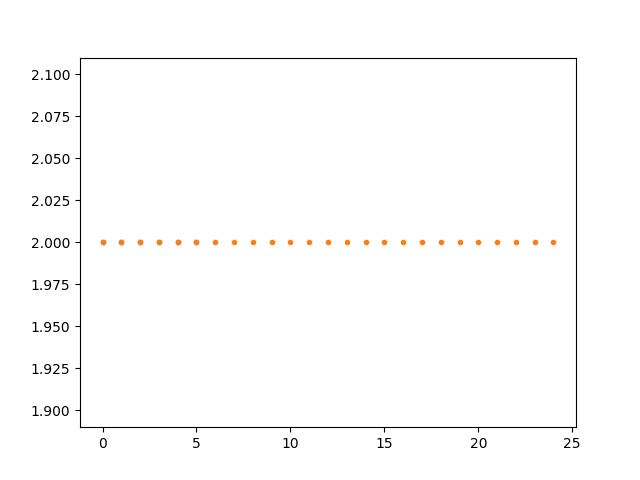

In [43]:
plt.figure()
plt.plot(cal.radii[big],'.')
plt.plot(cal.radii[small],'.')

In [45]:
np.nanmedian(cal.radii)

2.0

<IPython.core.display.Javascript object>


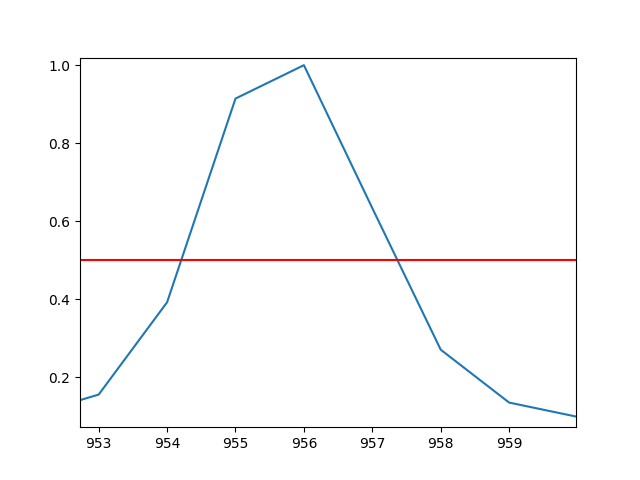

In [31]:
plt.figure()
plt.plot(image[:,305]/np.nanmax(image[:,305]))
plt.axhline(0.5,color='r')

In [25]:
len(cal.zps)

945

<IPython.core.display.Javascript object>


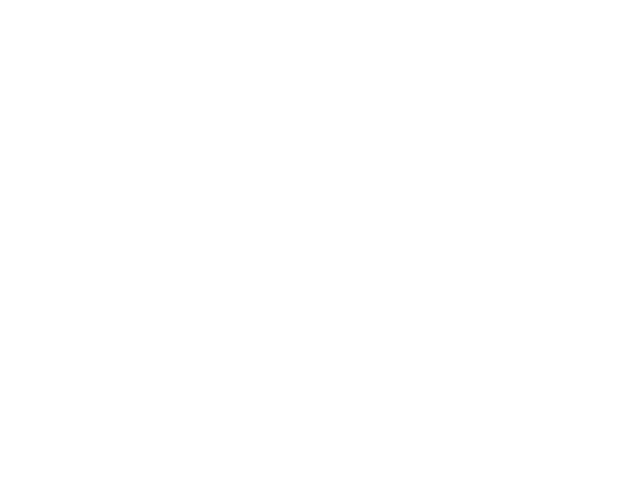

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1159 but corresponding boolean dimension is 945

In [24]:
ind = ~sigma_clip(cal.radii).mask
plt.figure()
plt.hist(cal.radii[big])

In [ ]:
np.nanmedian()

<IPython.core.display.Javascript object>


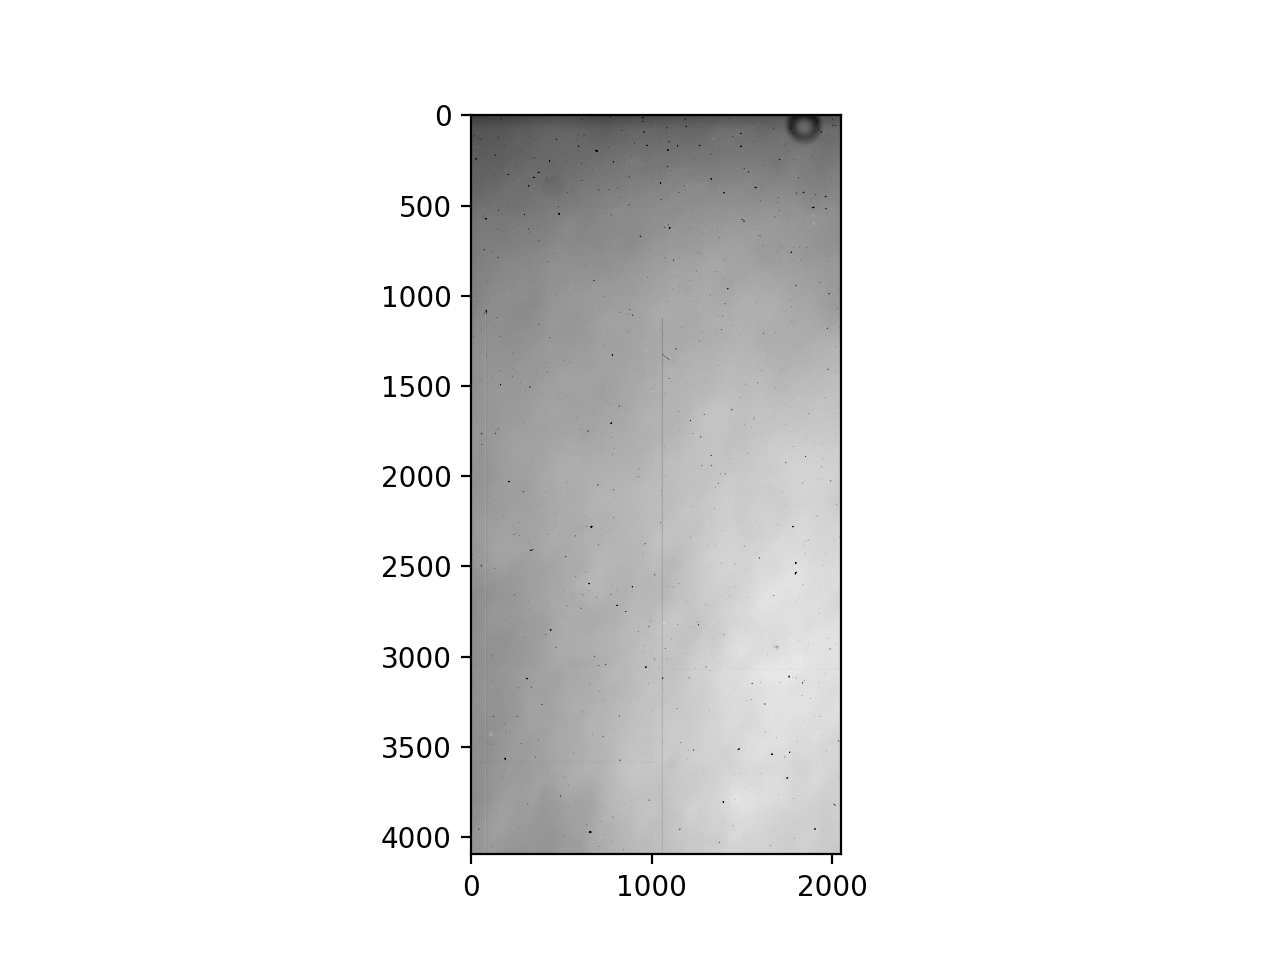

In [36]:
plt.figure()
plt.imshow((flat/np.nanmedian(flat)),vmin=0.8,vmax=1.1,cmap='gray')
#plt.plot(cal.ap_photom.xcenter.iloc[big],cal.ap_photom.ycenter.iloc[big],'r.')


In [44]:
wcs.all_pix2world(819,1731,0)

[array(350.99527063), array(-14.99799573)]

<IPython.core.display.Javascript object>


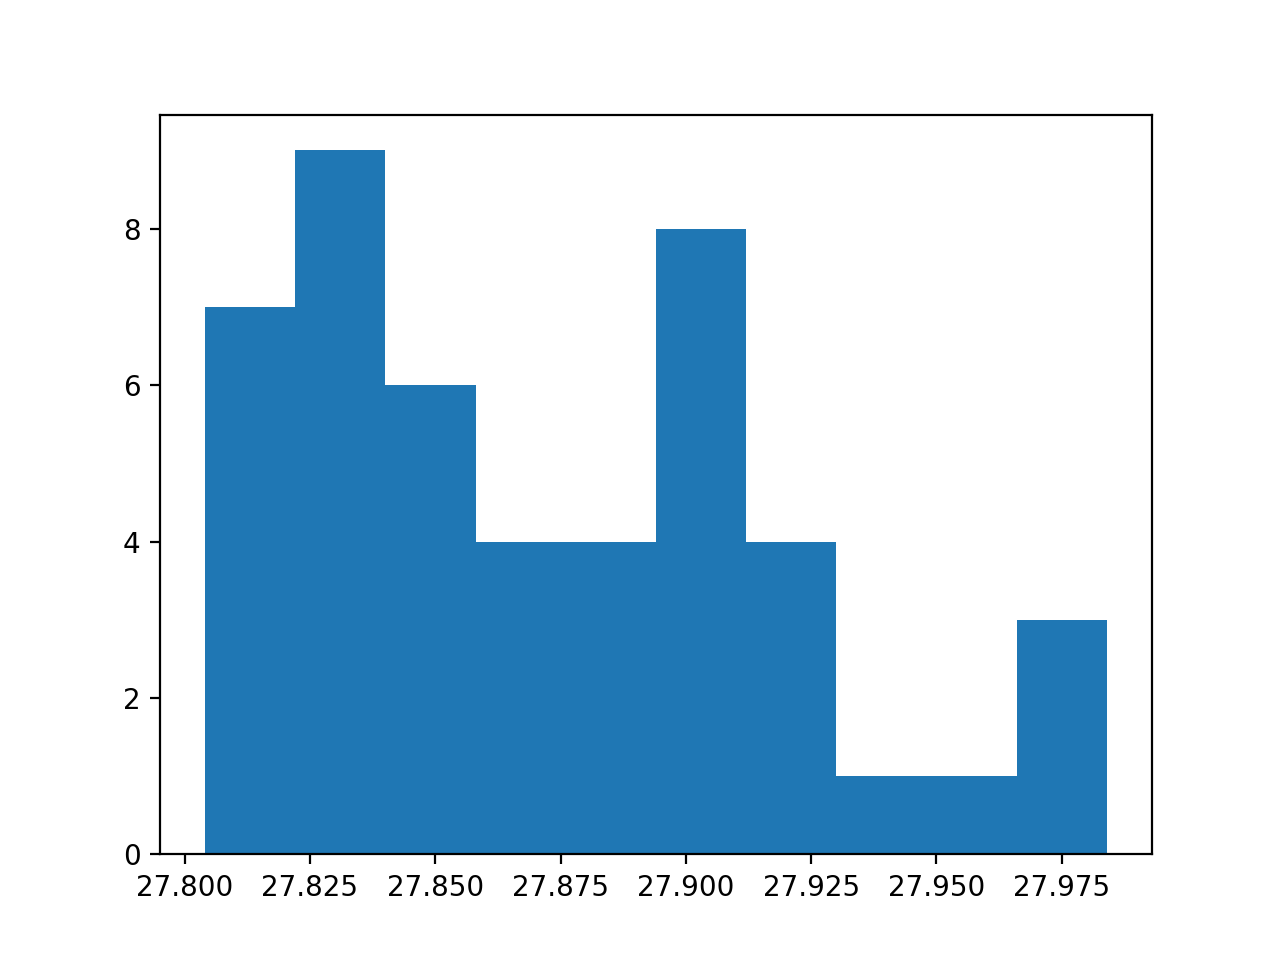

(array([7., 9., 6., 4., 4., 8., 4., 1., 1., 3.]),
 array([27.80408417, 27.82207662, 27.84006907, 27.85806153, 27.87605398,
        27.89404643, 27.91203888, 27.93003134, 27.94802379, 27.96601624,
        27.98400869]),
 <BarContainer object of 10 artists>)

In [22]:
plt.figure()
plt.hist(cal.zps[~big])

In [46]:
cal.sauron.cat_mags.iloc[big]

,_RAJ2000,_DEJ2000,ra,dec,g,r,i,z,y,g_e,r_e,i_e,z_e,y_e
8,350.714099,-14.556634,350.714529,-14.556697,17.8854,17.0992,16.8104,16.6792,16.5597,0.0078,0.0049,0.0025,0.0121,0.0085
12,350.723004,-14.752354,350.723481,-14.752229,17.7468,16.9671,16.6272,16.4751,16.3586,0.0127,0.0040,0.0023,0.0055,0.0083
15,350.730845,-14.450970,350.731511,-14.450986,18.0999,17.4923,17.2490,17.1511,17.0740,0.0063,0.0038,0.0029,0.0070,0.0122
19,350.735764,-14.592228,350.735992,-14.592294,18.2347,17.9201,17.8267,17.8212,17.8215,0.0153,0.0066,0.0087,0.0085,0.0112
30,350.756393,-14.511348,350.756846,-14.511351,15.2510,14.8464,14.7173,14.7452,14.6691,0.0060,0.0043,0.0036,0.0125,0.0062
74,350.830189,-14.604974,350.830201,-14.604917,18.2214,17.9144,17.8009,17.7638,17.7723,0.0093,0.0070,0.0043,0.0057,0.0168
81,350.840451,-14.601280,350.840474,-14.601211,16.0278,15.5339,15.3228,15.2549,15.1995,0.0044,0.0076,0.0030,0.0050,0.0036
103,350.873708,-14.547020,350.873746,-14.546945,17.8240,17.5807,17.4848,17.4844,17.4850,0.0234,0.0059,0.0045,0.0096,0.0091
124,350.905618,-14.521685,350.905683,-14.521553,16.8864,16.1799,15.9013,15.7992,15.7044,0.0076,0.0032,0.0022,0.0024,0.0027
151,350.953841,-14.643600,350.953813,-14.643600,18.0700,17.2866,16.9602,16.8405,16.7288,0.0196,0.0055,0.0033,0.0065,0.0069


In [41]:
np.nansum((mask & 2)> 0) / (mask.shape[0]*mask.shape[1])

0.0017232894897460938

In [5]:
a =np.array([1,2,4])
b =np.array([5,3,5])

In [6]:
np.nanmax([a,b])

5

In [11]:
b=np.nanmin(a,axis=1)
c = np.where()

In [18]:
a[b[np.newaxis,:]]

array([[[1, 2, 4],
        [5, 3, 5]]])

In [15]:
b.shape

(2,)

In [12]:
cat = cal.sauron.cat_mags
sig_noise = (cal.ap_photom['counts'] / cal.ap_photom['e_counts']).values

<IPython.core.display.Javascript object>


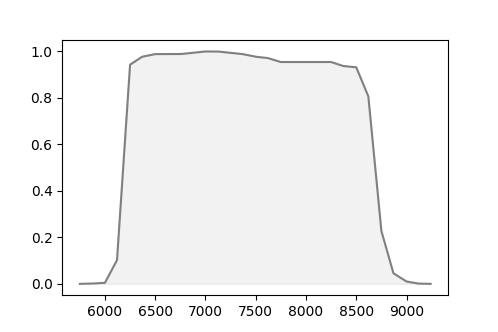

AttributeError: 'sauron' object has no attribute '_sys_bands'

In [36]:
cal.sauron.coverage_plot()

<IPython.core.display.Javascript object>


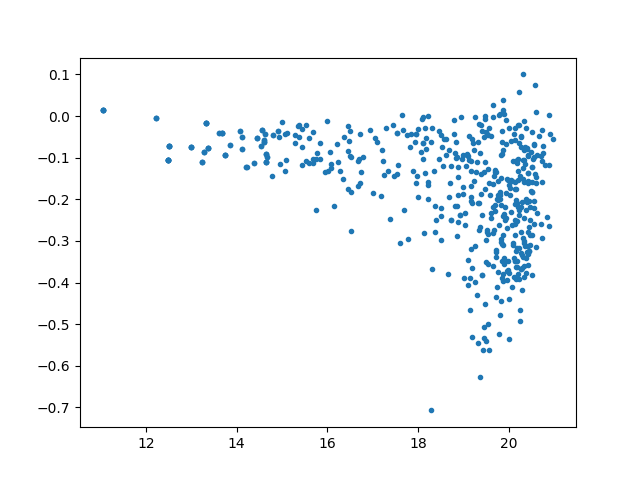

In [35]:
plt.figure()
plt.plot(cat['z'],cat['z']-cal.pred_mag,'.')

In [39]:
b

array([   4,   23,   49,   52,   72,  131,  161,  173,  190,  243,  254,
        295,  327,  345,  374,  378,  386,  409,  477,  479,  487,  488,
        494,  522,  540,  542,  545,  547,  589,  591,  601,  607,  619,
        651,  676,  688,  697,  732,  746,  747,  774,  775,  813,  817,
        825,  840,  850,  892,  903,  915,  937,  940,  955, 1004, 1020,
       1045, 1135, 1148, 1180, 1219, 1227, 1239, 1248, 1257, 1272, 1308,
       1312, 1315])

<IPython.core.display.Javascript object>


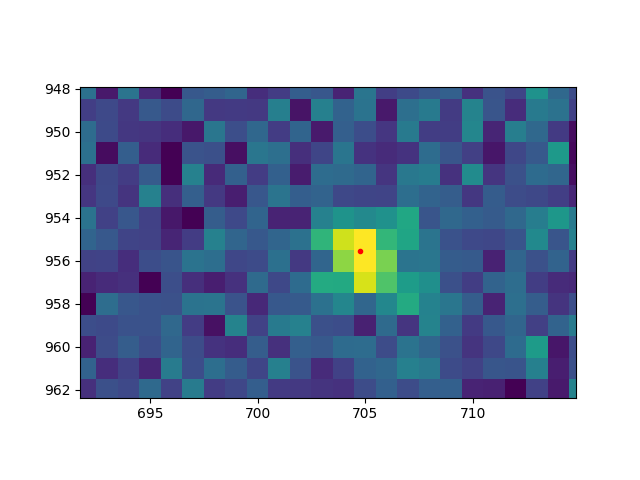

In [43]:
ind = cal.pred_mag >= 21
plt.figure()
plt.imshow(image,vmin=5300,vmax=5800)
plt.plot(x[ind],y[ind],'r.')
b = np.where(ind)[0]
for i in range(len(b)):
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radii[b[i]], color='r',fill=False)
    ax.add_patch(c)
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radii[b[i]]*4, color='C2',fill=False)
    ax.add_patch(c)
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radii[b[i]]*10, color='C2',fill=False)
    ax.add_patch(c)

In [21]:
sig_noise[ind]

array([ 3.64065975e-01,  2.67391135e+00,  4.21299547e-01,  2.35053099e+00,
        1.23315311e+00,  1.88374358e+00,  1.47811431e+00,  1.55638729e+00,
        1.67550280e+00,  2.08925333e+00,  1.42392205e+00,  4.59437909e-01,
        1.49471716e+00,  1.92640448e+00,  1.99010755e+00,  2.87129857e-01,
        8.42181666e-01,  1.70559904e+00,  1.73357930e+00,  1.15532816e+00,
       -8.85642553e-01, -3.48755123e+00,  1.61964703e-01,  3.99892257e+00,
        1.31609108e+00,  3.39946424e+00,  1.83464346e+00,  1.71208379e+00,
        2.17537885e+00, -4.45770558e-01,  1.38299353e+00,  2.45648667e+00,
        2.59645807e+00,  4.19228786e-01,  1.43284662e+00,  1.11617325e+00,
        9.06763056e-01,  1.39719157e-01,  1.60978424e+00,  1.31555011e+00,
        2.08582227e+00,  1.46193709e+00,  4.09742240e-01,  1.66136609e+00,
        9.00134823e-01,  6.74955838e-01,  1.88916391e-01,  1.75149529e+00,
        1.66295716e+00,  7.67743480e-05,  2.32350299e+00,  1.80704883e+00,
        6.32705748e-01,  

In [30]:
a[ind]

array([  66.30414492,   61.25404891,   70.82836076,   57.36841886,
         60.56365933,   57.61149709,   90.83457762,   61.09496951,
         75.45216036,   62.52964813,   57.41331416,   78.25701886,
         57.99110799,   53.2716359 ,   57.36454094,  313.84300966,
         77.30366338,   62.56947035,   59.27650248,   59.04931351,
         65.85174909,   57.76460222,  165.18422114,   61.42298631,
         54.25245701,   63.77245837,   60.58555212,   60.52580935,
         60.83396448,   56.18878001,   56.36032945,   59.71417835,
         58.7987078 ,   56.2301113 ,   80.76327733,   55.74434034,
         64.98373744,  526.45194938,   52.53733345,   58.61749508,
         64.52060592,   64.69737208,   54.54828319,   55.6941109 ,
         66.12879596,  155.50553974,   56.95294913,   57.98367851,
         54.86223481, 8024.81182329,   63.00495557,   57.39534686,
         55.36588789,   79.07306009,   58.9317447 ,   86.72484161,
         60.89043083, 5690.92400724,   60.03002848,   58.55259

In [24]:
a = cal.ap_photom['bkg_std'].values

In [28]:
m = sigma_clip(a).mask

<IPython.core.display.Javascript object>


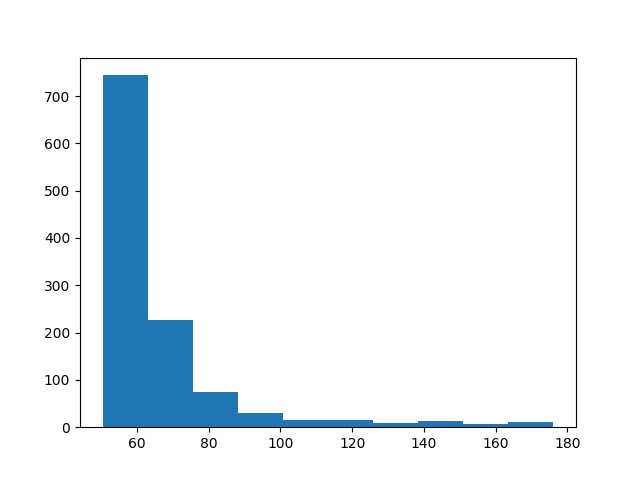

(array([744., 226.,  74.,  30.,  15.,  15.,   8.,  13.,   6.,  10.]),
 array([ 50.4165969 ,  62.98434732,  75.55209773,  88.11984814,
        100.68759856, 113.25534897, 125.82309938, 138.3908498 ,
        150.95860021, 163.52635062, 176.09410104]),
 <BarContainer object of 10 artists>)

In [29]:
plt.figure()
plt.hist(a[~m])

<IPython.core.display.Javascript object>


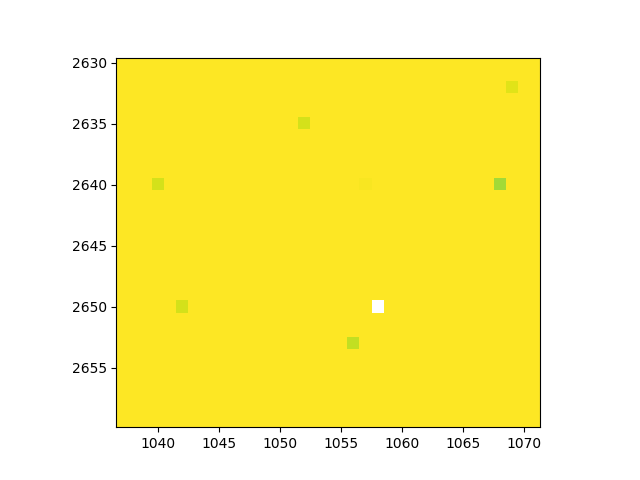

In [12]:
plt.figure()
plt.imshow(flat/e,vmax=100,vmin=50)

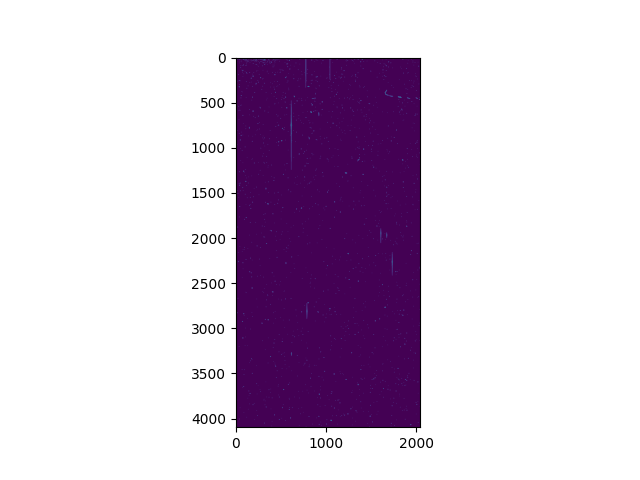

In [13]:
plt.figure()
plt.imshow(cal.sou)